In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve

In [2]:
bank_dataset=pd.read_csv('/content/bank-full.csv',sep=';')

In [3]:
bank_dataset

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
bank_dataset.isnull().sum().sum()

0

<ipython-input-5-105c9dc2c6cf>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=unknown_counts.index, y=unknown_counts.values, palette="viridis")


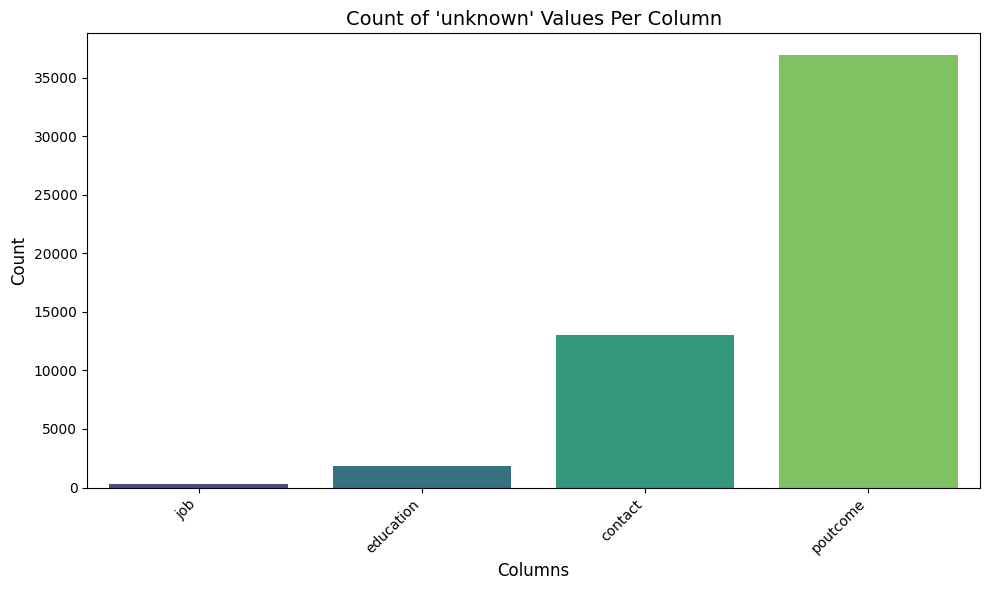

In [5]:
unknown_counts = bank_dataset.isin(["unknown"]).sum()

# Filter out columns with no unknown values
unknown_counts = unknown_counts[unknown_counts > 0]

# Plot the counts of "unknown" values
plt.figure(figsize=(10, 6))
sns.barplot(x=unknown_counts.index, y=unknown_counts.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Count of 'unknown' Values Per Column", fontsize=14)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()

In [6]:
unknown_percent = bank_dataset.isin(["unknown"]).sum() / len(bank_dataset.isin(["unknown"])) * 100
unknown_percent

,0
age,0.000000
job,0.637013
marital,0.000000
education,4.107407
default,0.000000
balance,0.000000
housing,0.000000
loan,0.000000
contact,28.798301
day,0.000000


In [7]:
essential_columns = ['job', 'education']
for col in essential_columns:
    bank_dataset = bank_dataset[bank_dataset[col] != "unknown"]

In [8]:
bank_dataset = bank_dataset.drop(columns=['contact', 'poutcome'])

In [9]:
bank_dataset.shape

(43193, 15)

In [10]:
bank_dataset

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
5,35,management,married,tertiary,no,231,yes,no,5,may,139,1,-1,0,no
6,28,management,single,tertiary,no,447,yes,yes,5,may,217,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,508,4,-1,0,no


In [11]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    bank_dataset[col] = le.fit_transform(bank_dataset[col])
    label_encoders[col] = le


In [12]:
bank_dataset['y'] = bank_dataset['y'].apply(lambda x: 1 if x == 'yes' else 0)

<ipython-input-13-7f73eeb31748>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


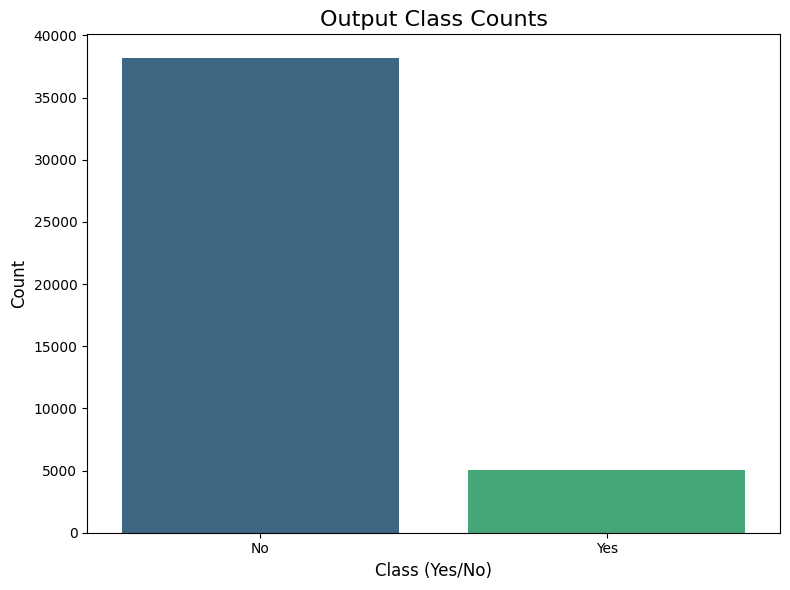

In [13]:
class_counts = bank_dataset['y'].value_counts()

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Output Class Counts", fontsize=16)
plt.xlabel("Class (Yes/No)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

In [14]:
X = bank_dataset.drop(columns=['y'])
y = bank_dataset['y']

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [17]:
tomek_links = TomekLinks()
X_train_balanced, y_train_balanced = tomek_links.fit_resample(X_train, y_train)

<ipython-input-18-451804884b16>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts_balanced.index, y=class_counts_balanced.values, palette="viridis")


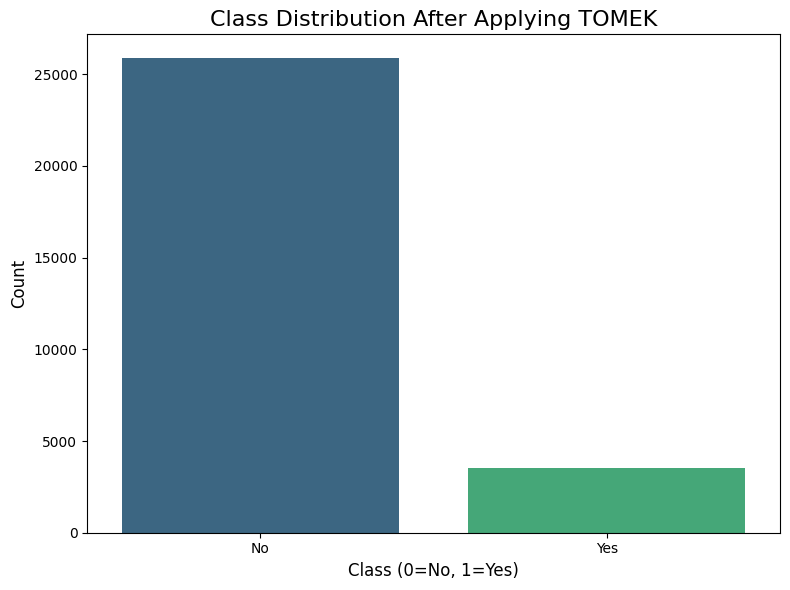

In [18]:
y_train_balanced_series = pd.Series(y_train_balanced)

# Count the occurrences of each class
class_counts_balanced = y_train_balanced_series.value_counts()


plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts_balanced.index, y=class_counts_balanced.values, palette="viridis")
plt.title("Class Distribution After Applying TOMEK", fontsize=16)
plt.xlabel("Class (0=No, 1=Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


In [19]:
X_train.shape

(30235, 14)

In [20]:
X_train_balanced.shape

(29393, 14)

In [21]:
best_rf_model = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',  # Adjust for class imbalance
    max_depth=None,
    min_samples_split=2,
    n_estimators=300
)


In [22]:
best_rf_model.fit(X_train_balanced, y_train_balanced)
y_pred_rf = best_rf_model.predict(X_test)
y_pred_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]

In [23]:
y_pred_adjusted = (y_pred_proba_rf >= 0.25).astype(int)

print("\nClassification Report with Adjusted Threshold (0.25):")
print(classification_report(y_test, y_pred_adjusted))


Classification Report with Adjusted Threshold (0.25):
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     11452
           1       0.48      0.78      0.60      1506

    accuracy                           0.88     12958
   macro avg       0.72      0.84      0.76     12958
weighted avg       0.91      0.88      0.89     12958



[[10179  1273]
 [  327  1179]]


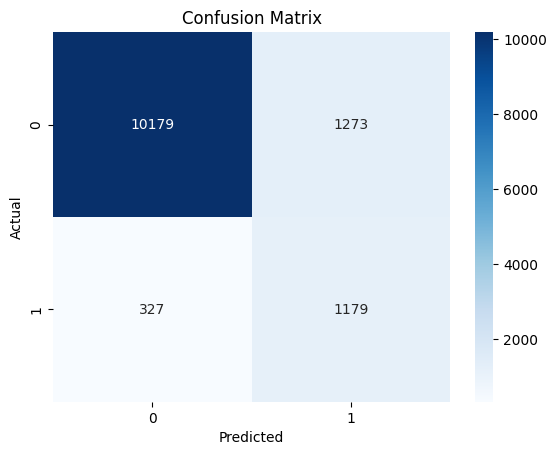

In [24]:
cm = confusion_matrix(y_test, y_pred_adjusted)
print(cm)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

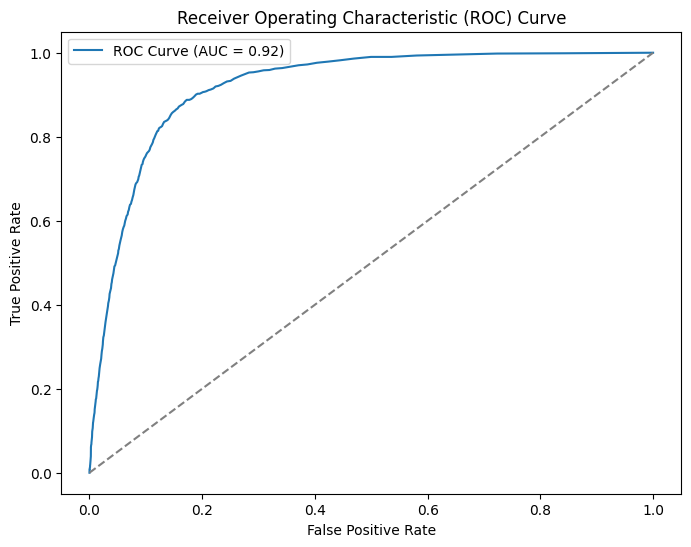

In [25]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


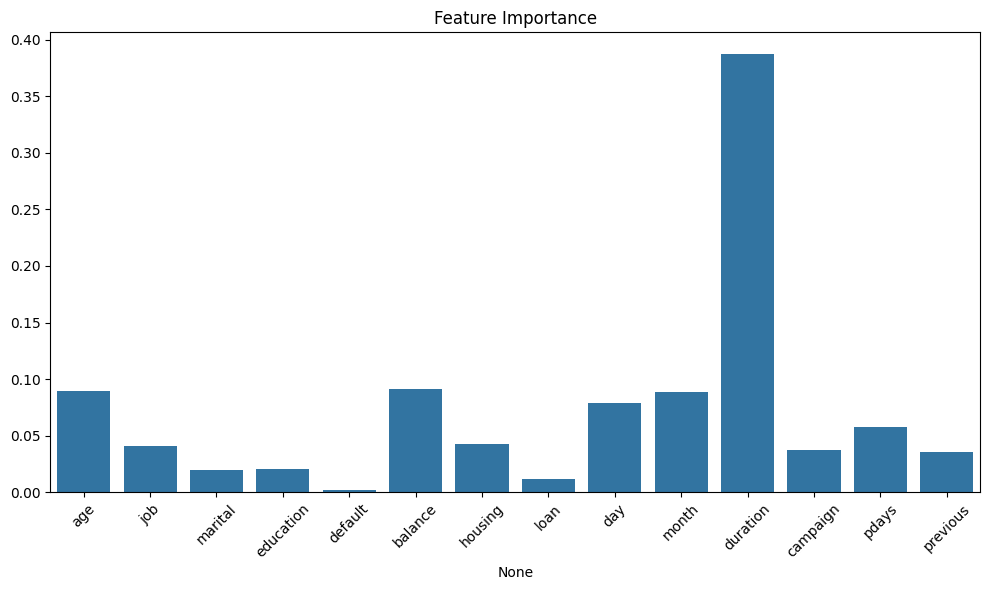

In [26]:
importance = best_rf_model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=X.columns, y=importance)
plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [27]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous'],
      dtype='object')

In [28]:
importance

array([0.08911196, 0.04030188, 0.01937145, 0.01993799, 0.00150633,
       0.09150529, 0.04264082, 0.01172549, 0.07839685, 0.08839941,
       0.38737164, 0.0370367 , 0.05728483, 0.03540936])

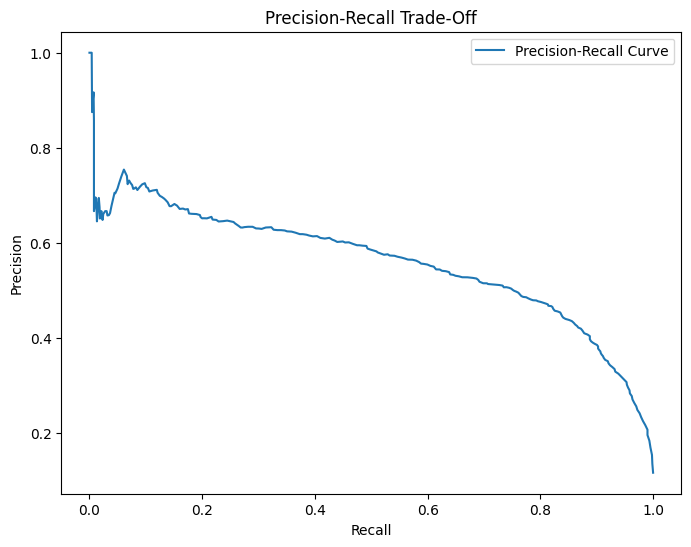

In [29]:
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.title("Precision-Recall Trade-Off")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

# **Extra Work**

In [30]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(max_iter=500, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(kernel='rbf', probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=42)
}

results = {}
for model_name, model in models.items():
    accuracy = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')
    precision = cross_val_score(model, X_scaled, y, cv=kf, scoring='precision')
    recall = cross_val_score(model, X_scaled, y, cv=kf, scoring='recall')
    f1 = cross_val_score(model, X_scaled, y, cv=kf, scoring='f1')
    roc_auc = cross_val_score(model, X_scaled, y, cv=kf, scoring='roc_auc')

    results[model_name] = {
        'Accuracy': np.mean(accuracy),
        'Precision': np.mean(precision),
        'Recall': np.mean(recall),
        'F1-Score': np.mean(f1),
        'ROC-AUC': np.mean(roc_auc)
    }

results_df = pd.DataFrame(results).T

In [39]:
results_df = pd.DataFrame(results)

from IPython.display import display
display(results_df)


,Logistic Regression,K-Nearest Neighbors,Support Vector Machine,Random Forest
Accuracy,0.891811,0.890029,0.893316,0.898271
Precision,0.599314,0.551547,0.629203,0.636416
Recall,0.209120,0.290577,0.199955,0.291376
F1-Score,0.310005,0.380323,0.303258,0.399543
ROC-AUC,0.862392,0.797108,0.832799,0.918867
